In [1]:
import pandas as pd
import requests
from IPython.display import Image
import time
from ftplib import FTP

from PIL import Image
from PIL import ImageFile
import rawpy
import imageio
ImageFile.LOAD_TRUNCATED_IMAGES = True


import os, shutil

import os
import sys

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
imagecount = 50

In [3]:
typdict = {'NDC':'str'}
df = pd.read_csv('../data/directory_of_images.txt',sep='|', dtype=typdict, names=['NDC','IDK','FILE','TYPE','DRUG'])
df = df.dropna()
df.DRUG = df.DRUG.str.upper()
df[['ORIG_FOLDER','IMAGES','FILENAME']] = df.FILE.str.split('/', expand=True)
df['FILETYPE'] = df.FILENAME.str[-4:]
df = df[df.FILETYPE != '.WMV']

In [4]:
ndcs = df.NDC.value_counts()
n = ndcs[ndcs == imagecount].index
# #n100 = ndcs[ndcs <= 100].index
# ndcs50100 = list(set(n50) & set(n100))
dfn = df[df.NDC.isin(n)]
dfn

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1226,00006074554,1,PillProjectDisc24/images/B7VF6YKZAKU7R6RH9PJC6...,C3PI_Reference,HYZAAR TAB 100-12.5,PillProjectDisc24,images,B7VF6YKZAKU7R6RH9PJC6-Q3QNJYYO4.CR2,.CR2
1227,00006074554,1,PillProjectDisc53/images/BZRBET5WWF01MHM0TS8UA...,C3PI_Reference,HYZAAR TAB 100-12.5,PillProjectDisc53,images,BZRBET5WWF01MHM0TS8UAJE_XKVUZV8.CR2,.CR2
1228,00006074554,1,PillProjectDisc106/images/W7_68M2JGM2VVC-5BAJU...,C3PI_Test,HYZAAR TAB 100-12.5,PillProjectDisc106,images,W7_68M2JGM2VVC-5BAJURW0-MELXXR.JPG,.JPG
1229,00006074554,1,PillProjectDisc109/images/ZSLAKUF3PNEZFLJIRVSV...,C3PI_Test,HYZAAR TAB 100-12.5,PillProjectDisc109,images,ZSLAKUF3PNEZFLJIRVSV6-ZS7V7-QL.JPG,.JPG
1230,00006074554,1,PillProjectDisc11/images/7RPWFG3ZF3E0LL1L!4TBA...,C3PI_Test,HYZAAR TAB 100-12.5,PillProjectDisc11,images,7RPWFG3ZF3E0LL1L!4TBAD7BD_WGWY.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
124244,65862019905,1,PillProjectDisc20/images/B48ZJ0_NS_D9U78ON7-GM...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG CAP,PillProjectDisc20,images,B48ZJ0_NS_D9U78ON7-GM3UGB26UI1W.PNG,.PNG
124245,65862019905,1,PillProjectDisc53/images/BZ1FSXTOE4T22MSGJXFRT...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG CAP,PillProjectDisc53,images,BZ1FSXTOE4T22MSGJXFRTL16HYT8GXR.PNG,.PNG
124246,65862019905,1,PillProjectDisc5/images/1XUYSB3P6Q36KO510FS9BW...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG CAP,PillProjectDisc5,images,1XUYSB3P6Q36KO510FS9BWMK5GW_AQ.PNG,.PNG
124247,65862019905,1,PillProjectDisc66/images/CIHOS-4VFVZT8UTQZ00OY...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG CAP,PillProjectDisc66,images,CIHOS-4VFVZT8UTQZ00OYFI-M!HB4OW.PNG,.PNG


In [5]:
dfn.DRUG.value_counts()

GLIPIZIDE ER 10MG TAB         50
CLEOCIN 75MG CAPS             50
HYDROXYZINE  HCL 10MG TABS    50
HYOMAX-FT 0.125MG TAB         50
HYOMAX-DT 0.375MG TABLET      50
IBUPROFEN 600MG TAB           50
HYZAAR TAB 100-12.5           50
BENZONATATE CAPSULES, USP     50
FLUOXETINE 40MG CAP           50
INDERAL LA CAP 160MG          50
CLARITHROMYCIN 250            50
HCTZ 50MG TABS                50
GABAPENTIN 300MG CAP          50
INDOMETHACIN CAPSULES USP     33
OLANZAPINE 2.5MG TAB          33
OLANZAPINE TABLETS USP        17
INDOMETHACIN CAPSULES, USP    17
Name: DRUG, dtype: int64

In [6]:
drugs = dfn.NDC.value_counts()
drugslist = drugs.index.tolist()
len(dfn.NDC.value_counts()),drugs

(15,
 65862019905    50
 24090047988    50
 00591084510    50
 00555188302    50
 00093402901    50
 24486060310    50
 65862019430    50
 24486060490    50
 00781196160    50
 55111068305    50
 00006074554    50
 00009033102    50
 23155010501    50
 00093576756    50
 64125013010    50
 Name: NDC, dtype: int64)

In [7]:
df_a = dfn.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,"BENZONATATE CAPSULES, USP",00555188302
1,CLARITHROMYCIN 250,00781196160
2,CLEOCIN 75MG CAPS,00009033102
3,FLUOXETINE 40MG CAP,65862019430
4,GABAPENTIN 300MG CAP,65862019905
5,GLIPIZIDE ER 10MG TAB,00591084510
6,HCTZ 50MG TABS,64125013010
7,HYDROXYZINE HCL 10MG TABS,23155010501
8,HYOMAX-DT 0.375MG TABLET,24486060490
9,HYOMAX-FT 0.125MG TAB,24486060310


In [8]:
droplist = []

df = dfn[~dfn.NDC.isin(droplist)]

In [9]:
df.DRUG[df.NDC == '00555188302'] = 'BENZONATATE'
df.DRUG[df.NDC == '00781196160'] = 'CLARITHROMYCIN 250MG'
df.DRUG[df.NDC == '00009033102'] = 'CLEOCIN 75MG'
df.DRUG[df.NDC == '65862019430'] = 'FLUOXETINE 40MG '
df.DRUG[df.NDC == '65862019905'] = 'GABAPENTIN 300MG'
df.DRUG[df.NDC == '00591084510'] = 'GLIPIZIDE ER 10MG'
df.DRUG[df.NDC == '64125013010'] = 'HCTZ 50MG'
df.DRUG[df.NDC == '23155010501'] = 'HYDROXYZINE HCL 10MG'
df.DRUG[df.NDC == '24486060490'] = 'HYOMAX-DT 0.375MG'
df.DRUG[df.NDC == '24486060310'] = 'HYOMAX-FT 0.125MG'
df.DRUG[df.NDC == '00006074554'] = 'HYZAAR 100-12.'
df.DRUG[df.NDC == '55111068305'] = 'IBUPROFEN 600MG'
df.DRUG[df.NDC == '24090047988'] = 'INDERAL LA 160MG'
df.DRUG[df.NDC == '00093402901'] = 'INDOMETHACIN'
df.DRUG[df.NDC == '00093576756'] = 'OLANZAPINE 2.5MG'

/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alphonsowoodbury/.conda/envs/aw0520/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [10]:
df

,NDC,IDK,FILE,TYPE,DRUG,ORIG_FOLDER,IMAGES,FILENAME,FILETYPE
1226,00006074554,1,PillProjectDisc24/images/B7VF6YKZAKU7R6RH9PJC6...,C3PI_Reference,HYZAAR 100-12.,PillProjectDisc24,images,B7VF6YKZAKU7R6RH9PJC6-Q3QNJYYO4.CR2,.CR2
1227,00006074554,1,PillProjectDisc53/images/BZRBET5WWF01MHM0TS8UA...,C3PI_Reference,HYZAAR 100-12.,PillProjectDisc53,images,BZRBET5WWF01MHM0TS8UAJE_XKVUZV8.CR2,.CR2
1228,00006074554,1,PillProjectDisc106/images/W7_68M2JGM2VVC-5BAJU...,C3PI_Test,HYZAAR 100-12.,PillProjectDisc106,images,W7_68M2JGM2VVC-5BAJURW0-MELXXR.JPG,.JPG
1229,00006074554,1,PillProjectDisc109/images/ZSLAKUF3PNEZFLJIRVSV...,C3PI_Test,HYZAAR 100-12.,PillProjectDisc109,images,ZSLAKUF3PNEZFLJIRVSV6-ZS7V7-QL.JPG,.JPG
1230,00006074554,1,PillProjectDisc11/images/7RPWFG3ZF3E0LL1L!4TBA...,C3PI_Test,HYZAAR 100-12.,PillProjectDisc11,images,7RPWFG3ZF3E0LL1L!4TBAD7BD_WGWY.JPG,.JPG
...,...,...,...,...,...,...,...,...,...
124244,65862019905,1,PillProjectDisc20/images/B48ZJ0_NS_D9U78ON7-GM...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG,PillProjectDisc20,images,B48ZJ0_NS_D9U78ON7-GM3UGB26UI1W.PNG,.PNG
124245,65862019905,1,PillProjectDisc53/images/BZ1FSXTOE4T22MSGJXFRT...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG,PillProjectDisc53,images,BZ1FSXTOE4T22MSGJXFRTL16HYT8GXR.PNG,.PNG
124246,65862019905,1,PillProjectDisc5/images/1XUYSB3P6Q36KO510FS9BW...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG,PillProjectDisc5,images,1XUYSB3P6Q36KO510FS9BWMK5GW_AQ.PNG,.PNG
124247,65862019905,1,PillProjectDisc66/images/CIHOS-4VFVZT8UTQZ00OY...,MC_COOKED_CALIBRATED_V1.2,GABAPENTIN 300MG,PillProjectDisc66,images,CIHOS-4VFVZT8UTQZ00OYFI-M!HB4OW.PNG,.PNG


In [11]:
df.DRUG.value_counts()

INDOMETHACIN            50
CLEOCIN 75MG            50
CLARITHROMYCIN 250MG    50
FLUOXETINE 40MG         50
GLIPIZIDE ER 10MG       50
HYOMAX-FT 0.125MG       50
GABAPENTIN 300MG        50
OLANZAPINE 2.5MG        50
HYDROXYZINE HCL 10MG    50
HYOMAX-DT 0.375MG       50
INDERAL LA 160MG        50
HCTZ 50MG               50
BENZONATATE             50
IBUPROFEN 600MG         50
HYZAAR 100-12.          50
Name: DRUG, dtype: int64

In [12]:
df_a = df.groupby(['DRUG','NDC']).count()
df_a.reset_index(inplace=True)
drug_ndc = df_a[['DRUG','NDC']]
drug_ndc

,DRUG,NDC
0,BENZONATATE,00555188302
1,CLARITHROMYCIN 250MG,00781196160
2,CLEOCIN 75MG,00009033102
3,FLUOXETINE 40MG,65862019430
4,GABAPENTIN 300MG,65862019905
5,GLIPIZIDE ER 10MG,00591084510
6,HCTZ 50MG,64125013010
7,HYDROXYZINE HCL 10MG,23155010501
8,HYOMAX-DT 0.375MG,24486060490
9,HYOMAX-FT 0.125MG,24486060310


## Sample Batch

In [14]:
samplesdf = df.groupby(['NDC']).min().reset_index()
sampleslist = samplesdf.FILE.tolist()
sampleslist.sort()

ftpdir = {}
for i in range(0,len(sampleslist)):
    ftpcall = sampleslist[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)

5

In [23]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data


In [28]:
%pwd

'/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data'

In [25]:
folder = 'img'+str(imagecount)
paths = folder + '/' + folder
print(folder, paths)

try:
    os.makedirs(paths)
except:
    print('Folder present')

img50 Pills/raw
Folder present


In [30]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/Pills/raw

dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/Pills/raw


KeyboardInterrupt: 

In [57]:
%cd ..

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img50


In [58]:
for filename in os.listdir():
    if filename.endswith(".PNG") or filename.endswith(".JPG"): 
        im1 = Image.open(r'{}'.format(filename))
        rgb_im = im1.convert('RGB')
        rgb_im.save(r'{}/{}.JPG'.format(folder,filename[:-4]))
        continue
    elif filename.endswith(".CR2") and os.path.getsize(filename) > 0:
        print(filename)
        raw = rawpy.imread('{}'.format(filename))
        rgb = raw.postprocess()
        imageio.imsave('{}/{}.JPG'.format(folder,filename[:-4]), rgb)
        print(filename)
        continue

%cd $folder

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/img50/img50


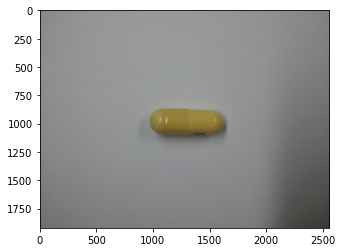

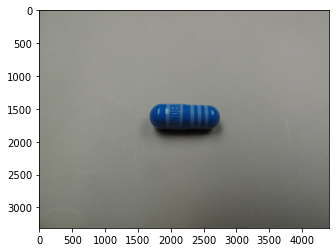

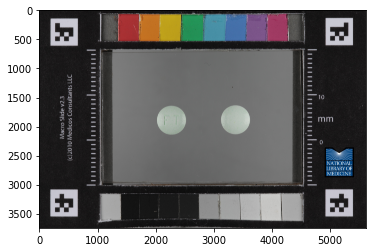

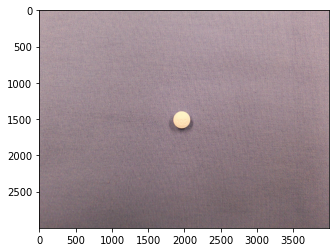

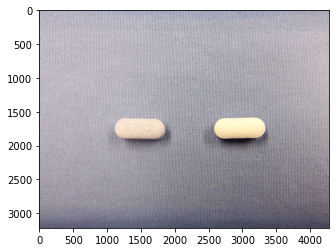

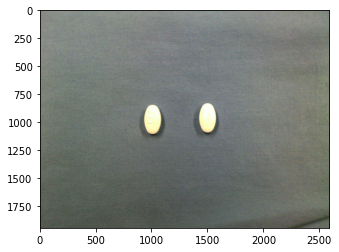

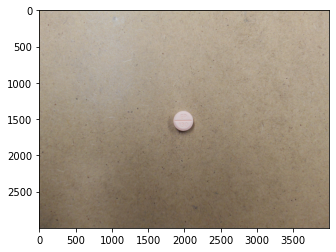

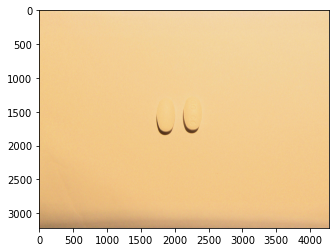

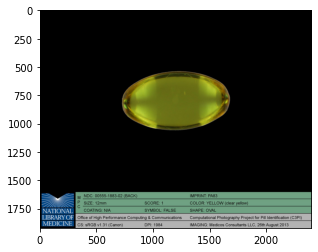

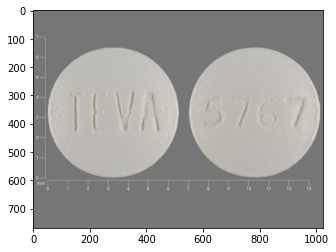

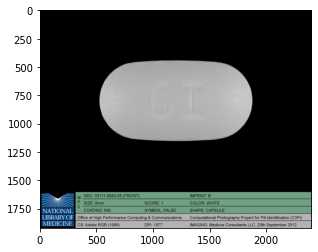

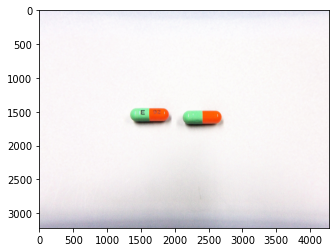

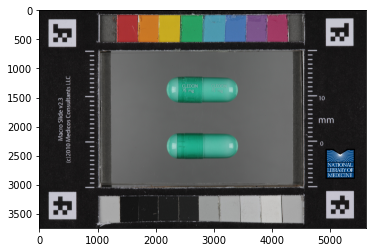

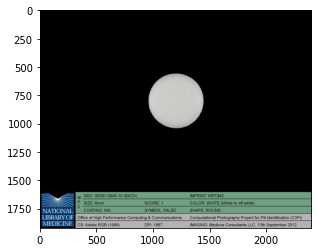

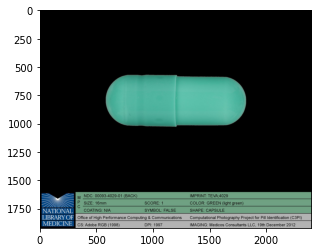

In [59]:
images = os.listdir()
def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in images:
    process(file)



# Get Batch

In [18]:
drugsftp = df.FILE.tolist()
drugsftp.sort()
drugsftp[:10]

['PillProjectDisc1/images/!1ECEZFCQZ5I6S0RP6IZ-T!_6Y2RXW.PNG',
 'PillProjectDisc1/images/!AOKWIRBTDVYLX41JNYGUE1OPO6-15.JPG',
 'PillProjectDisc1/images/!ER_L-9UW4J0KP5FQTJ2-LQKM!FKUK.JPG',
 'PillProjectDisc1/images/!GAGH9SEMPWXKDD0B79O2WDHDYV_3.JPG',
 'PillProjectDisc1/images/!J0N020HAC1N9IDCYU3QJJN!5YA2A!.PNG',
 'PillProjectDisc1/images/!Y7FKLUPG3TK-OZ7A5EVQCVF420-VJ.PNG',
 'PillProjectDisc10/images/6MBF88872OTKN19TLJH!0QLNOED708.JPG',
 'PillProjectDisc10/images/6MN99VY2IAUCLJKPCED_JG-ZAGUAPO.PNG',
 'PillProjectDisc10/images/6R55YN3L0OOT3RFCFHZNUMSETXTC22.JPG',
 'PillProjectDisc10/images/6R66C0USAMBP_!SWRIXWYLZ15G9RL.PNG']

In [19]:
ftpdir = {}
for i in range(0,len(drugsftp)):
    ftpcall = drugsftp[i].split('/')
    ftppath = ftpcall[0]+'/'+ftpcall[1]+ '/'
    ftpfile = ftpcall[-1]
    ftpdir.setdefault(ftppath,[])
    ftpdir[ftppath].append(ftpfile)
len(ftpdir)

110

In [31]:
%cd /Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/Pills/raw

dloaded = os.listdir()
for key in ftpdir.keys():
    ftp = FTP('lhcftp.nlm.nih.gov')
    ftp.login()
    ftp.cwd('Open-Access-Datasets/Pills//')
    ftp.cwd(key)
    for value in ftpdir[key]:
        if value not in dloaded:
            with open(value, 'wb') as fp:
                ftp.retrbinary('RETR '+ value, fp.write)
    ftp.cwd('..')
    ftp.cwd('..')

/Users/alphonsowoodbury/Projects/Computer_Vision-Medication_Identification/Data/Pills/raw


KeyboardInterrupt: 